# Introduction

Les menaces liées aux logiciels malveillants ont considérablement évolué avec le temps, devenant de plus en plus sophistiquées et insidieuses. La protection contre ces attaques nécessite une approche proactive, intégrant des technologies avancées pour détecter et contrer ces menaces. Dans ce contexte, notre projet se concentre sur le développement d'un système de détection de logiciels malveillants basé sur le machine learning. L'objectif principal est de créer un modèle capable de discriminer efficacement entre les fichiers exécutables légitimes et malveillants, en se basant sur une analyse approfondie de caractéristiques spécifiques extraites de ces fichiers.

Les enjeux de la cybersécurité actuels font de cette tâche une priorité, car les attaquants cherchent constamment à contourner les défenses traditionnelles. La sophistication croissante des logiciels malveillants rend impératif le recours à des approches innovantes, telles que le machine learning, pour renforcer notre capacité à anticiper et contrer ces menaces. Ainsi, ce projet vise à contribuer à l'arsenal de défense en proposant un modèle robuste et précis, capable d'identifier rapidement les fichiers exécutables malveillants tout en minimisant les faux positifs.

Pour atteindre cet objectif, nous nous appuyons sur un ensemble de données riche en informations, comprenant des caractéristiques diverses extraites des fichiers exécutables. Ce rapport détaillera la méthodologie employée, du choix des caractéristiques à la mise en place du modèle de machine learning, en passant par l'évaluation de sa performance. En outre, nous discuterons des implications de notre travail, des limitations du modèle et des perspectives d'amélioration, affirmant ainsi la pertinence et la contribution de notre approche à la lutte contre les menaces numériques.


# Modeles Machines learning

## Acquisition de données

Pour l'acquisition de données, notre ensemble de données a été obtenu à partir de la plateforme Kaggle, une communauté en ligne de scientifiques de données et de praticiens du machine learning. 

## Importation des Libraires

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import pefile
import sklearn.ensemble as ek
from sklearn.feature_selection import SelectFromModel
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import svm
import sklearn.metrics as metrics

## Acquisation et Exploration de la DataSet DES Malware

In [5]:
malData=pd.read_csv("C:/Users/ridab/Desktop/dataset.csv",sep="|",low_memory =True )
malData.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1


La base de données se compose de 138,047 échantillons avec 57 caractéristiques par échantillon. Ces caractéristiques comprennent des informations telles que la taille du fichier, les caractéristiques du système, la présence d'importations DLL, etc. La répartition des classes est déséquilibrée, avec 70.1% d'échantillons légitimes et 29.9% d'échantillons malveillants, soulignant la nécessité de gérer ce déséquilibre lors de la modélisation

In [7]:
malData.shape

(138047, 57)

La sortie de `malData.describe()` fournit un aperçu statistique des principales caractéristiques de notre ensemble de données. Voici une interprétation des principales statistiques pour quelques caractéristiques sélectionnées :

- **Machine:** La colonne "Machine" présente des statistiques descriptives telles que la moyenne, l'écart type, la valeur minimale, les quartiles et la valeur maximale pour le type de machine. On observe une variation significative, indiquant probablement la diversité des systèmes cibles.

- **SizeOfOptionalHeader:** Cette caractéristique indique la taille de l'en-tête facultatif. Les statistiques révèlent une moyenne de 225.85 avec un écart type de 5.12, indiquant une certaine variabilité autour de la moyenne.

- **Characteristics:** Cette colonne représente les caractéristiques du fichier. On observe que la valeur minimale est 2, la moyenne est de 4444.15, et la valeur maximale est 49551. Cela suggère une large gamme de caractéristiques, nécessitant une analyse plus approfondie.

- **SizeOfCode:** La taille du code moyen est de 242595.6, avec une grande variabilité comme le montre l'écart type élevé de 5754485. Cette caractéristique pourrait avoir un impact significatif sur la détection de logiciels malveillants.

- **legitimate:** La colonne "legitimate" est notre variable cible. La moyenne de 0.299 indique que le dataset est déséquilibré, avec environ 70% d'échantillons légitimes et 30% d'échantillons malveillants.

La présence de valeurs extrêmes dans certaines caractéristiques, comme observé dans "SizeOfCode" et "Characteristics", suggère une possible nécessité de normalisation ou de transformation pour mieux traiter ces données lors de la modélisation. Ces observations initiales peuvent orienter davantage le prétraitement des données et influencer le choix des méthodes de modélisation.

In [8]:
malData.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,4.096000e+03,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,4.096000e+03,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,1.000000


La liste des colonnes de votre ensemble de données est la suivante :

1. 'Name'
2. 'md5'
3. 'Machine'
.....


Chaque colonne représente une caractéristique spécifique de vos données, y compris des détails sur la structure du fichier, des informations d'en-tête, des attributs du système d'exploitation, des informations d'importation/exportation, des ressources du fichier, et la variable cible "legitimate" indiquant si le fichier est légitime ou malveillant. Ces colonnes seront cruciales pour entraîner votre modèle de machine learning.

In [9]:
malData.columns    # name of the columns

Index(['Name', 'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize',
       'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
       'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb',
       'Impor

La sortie de `malData.info()` fournit des informations détaillées sur la structure de votre ensemble de données. Voici une interprétation des éléments clés :

- **Nombre d'entrées:** L'ensemble de données contient 138,047 entrées (échantillons).
- **Nombre de colonnes:** Il y a un total de 57 colonnes dans l'ensemble de données.
- **Types de données:** Les types de données comprennent `float64` pour 10 colonnes, `int64` pour 45 colonnes, et `object` pour 2 colonnes ('Name' et 'md5').
- **Taille totale de la mémoire:** L'ensemble de données occupe environ 60.0 Mo en mémoire.
- **Colonnes non nulles:** Aucune colonne ne contient de valeurs nulles, ce qui indique que chaque colonne a 138,047 valeurs non nulles, ce qui est cohérent avec le nombre total d'entrées.

Ces informations sont essentielles pour comprendre la structure de vos données avant de les utiliser dans la modélisation. La présence de colonnes de différents types suggère la nécessité de traiter les données catégorielles (comme 'Name' et 'md5') différemment des données numériques. De plus, l'absence de valeurs nulles simplifie le processus de prétraitement des données.

In [ ]:
malData.info()

Le diagramme circulaire révèle une disparité significative entre les classes dans l'ensemble de données, avec 70.1% des fichiers étant légitimes et 29.9% étant malveillants. Cette distribution déséquilibrée suggère la nécessité de prendre des mesures appropriées lors de la modélisation pour éviter tout biais en faveur de la classe majoritaire, soulignant ainsi l'importance de techniques de gestion des données déséquilibrées.

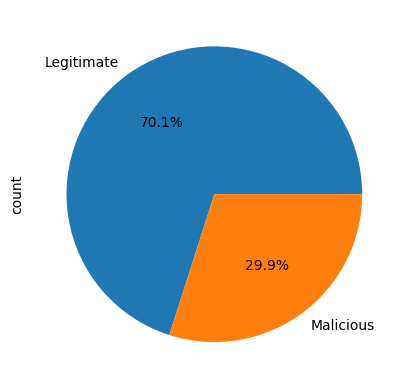

In [11]:
import matplotlib.pyplot as plt
malData["legitimate"].value_counts().plot(kind="pie", autopct="%1.1f%%", labels=["Legitimate", "Malicious"])
plt.show()


In [12]:
legit= malData[0:41323].drop(["legitimate"], axis=1)
mal= malData[41323::].drop(["legitimate"], axis=1)
print("The shape of the legit dataset is: %s samples, %s features"%(legit.shape[0],legit.shape[1]))
print("The shape of the mal dataset is: %s samples, % s features" %(mal.shape[0],mal.shape[1]))

The shape of the legit dataset is: 41323 samples, 56 features
The shape of the mal dataset is: 96724 samples, 56 features


## Selection des "features"

Dans la préparation des données, nous avons constitué deux ensembles distincts : 

- **X :** Il englobe les caractéristiques du modèle, excluant les colonnes 'Name' et 'md5'. Ces colonnes ont été éliminées car elles renferment des valeurs alphanumériques incompatibles avec les modèles de classification, qui exigent des valeurs numériques. Ainsi, l'ensemble X est prêt à être utilisé dans le processus de modélisation.

- **y :** Il représente la variable cible 'legitimate'. La colonne 'legitimate' a été assignée à cet ensemble, fournissant ainsi les étiquettes de classe correspondantes.

Cette étape est fondamentale pour garantir que les données soient compatibles avec les modèles de machine learning, assurant ainsi une intégration fluide dans le processus de modélisation.

In [13]:
# Feature
X = malData.drop(['Name','md5','legitimate'],axis=1).values    #On drop ceci parceque le modle de classification n'acceptera pas des valeurs alpha (float and int only)
# Target variable
y = malData['legitimate'].values

Cette section de code utilise le modèle Extra Trees Classifier pour entraîner un modèle de classification sur l'ensemble des caractéristiques (X) et la variable cible (y). Ensuite, une méthode de sélection de caractéristiques, `SelectFromModel`, est employée en utilisant les importances des caractéristiques générées par le modèle Extra Trees. Les caractéristiques les plus significatives sont sélectionnées, et une nouvelle matrice de caractéristiques, `X_new`, est créée en appliquant cette transformation. Le nombre de caractéristiques sélectionnées est enregistré dans la variable `nbfeatures`. Cette approche de sélection de caractéristiques vise à réduire la dimension de l'espace des caractéristiques tout en conservant l'information essentielle pour la classification, contribuant ainsi à améliorer l'efficacité et la performance du modèle.

In [14]:
extratrees = ek.ExtraTreesClassifier().fit(X,y)
model = SelectFromModel(extratrees, prefit=True)
X_new = model.transform(X)
nbfeatures = X_new.shape[1]

In [15]:
nbfeatures # nombre de features importants

14

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,y,test_size=0.2, random_state=42)

In [17]:
features = []
index = np.argsort(extratrees.feature_importances_)[::-1][:nbfeatures] #get the indices of the top features based on their importances

#### Voici les "features les plus importants":

In [18]:
for f in range(nbfeatures):
    print("%d. feature %s (%f)" % (f + 1, malData.columns[2+index[f]], extratrees.feature_importances_[index[f]]))
    features.append(malData.columns[2+f])

1. feature DllCharacteristics (0.157353)
2. feature Machine (0.095711)
3. feature Characteristics (0.094738)
4. feature Subsystem (0.073479)
5. feature VersionInformationSize (0.069377)
6. feature SectionsMaxEntropy (0.049213)
7. feature ResourcesMaxEntropy (0.048897)
8. feature SizeOfOptionalHeader (0.045507)


9. feature MajorSubsystemVersion (0.042305)
10. feature ImageBase (0.040798)
11. feature ResourcesMinEntropy (0.035682)
12. feature SizeOfStackReserve (0.027706)
13. feature MajorOperatingSystemVersion (0.021339)
14. feature SectionsMeanEntropy (0.020878)


## Construction du Model

Dans cette phase déterminante du projet, nous avons consacré nos efforts à la construction du modèle en explorant la performance de plusieurs algorithmes de classification, à savoir la Random Forest, XGBoost, et LightGBM. L'objectif primordial était d'évaluer la capacité de ces modèles à détecter efficacement les logiciels malveillants dans notre ensemble de données.

Le processus a débuté par l'entraînement de chaque modèle sur l'ensemble d'entraînement (X_train, y_train), où les caractéristiques sélectionnées ont été utilisées pour apprendre les motifs inhérents aux données. Par la suite, la performance de chaque modèle a été évaluée sur l'ensemble de test (X_test, y_test), représentant des données inconnues, afin d'observer comment les modèles généralisent sur de nouvelles observations.

Pour établir une évaluation robuste, nous avons pris en compte plusieurs métriques telles que la précision, le rappel, la F1-score, et la courbe ROC. Ces indicateurs nous ont fourni une compréhension approfondie des forces et des faiblesses de chaque modèle dans le contexte de la détection de logiciels malveillants.

Cette démarche structurée d'évaluation comparative des performances des modèles nous permettra de prendre une décision éclairée quant au choix de l'algorithme le plus efficace pour notre tâche spécifique.

### 1. Random Forest

In [19]:
clf = ek.RandomForestClassifier(n_estimators=50)
clf.fit(X_train,y_train)
score_trn = clf.score(X_train,y_train)
score_tst = clf.score(X_test,y_test)
print ("%s : %s " %("RandomForest_tst", score_tst))
print ("%s : %s " %("RandomForest_trn", score_trn))


RandomForest_tst : 0.9943860919956538 
RandomForest_trn : 0.9999275605096118 


In [20]:
# Calculate the variance of individual tree predictions
tree_predictions = np.stack([tree.predict(X_test) for tree in clf.estimators_], axis=1)
tree_variances = np.var(tree_predictions, axis=1)

# Calculate the overall variance of the model
model_variance = np.var(tree_variances)

print(f"Model Variance: {model_variance}")

Model Variance: 0.0008625084217723421


##### Matrice de Confusion

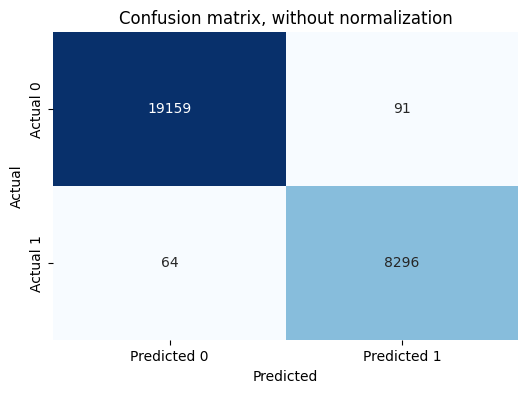

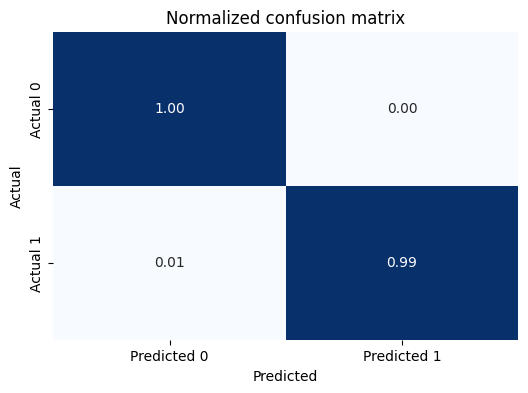

In [21]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    # Compute confusion matrix
    cm = confusion_matrix(y_test, clf.fit(X_train,y_train).predict(X_test))
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='.2f' if normalize else 'd', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()


Les résultats fournis concernent l'évaluation d'un modèle de Random Forest sur l'ensemble de test et d'entraînement. Voici une interprétation des métriques et des matrices de confusion associées :

- **RandomForest_tst : 0.9944 :** La précision du modèle sur l'ensemble de test est extrêmement élevée, atteignant environ 99.44%. Cela indique que le modèle est capable de classifier avec précision la grande majorité des échantillons dans l'ensemble de test.

- **RandomForest_trn : 0.9999 :** La précision sur l'ensemble d'entraînement est également très élevée, atteignant environ 99.99%. Cela suggère que le modèle a appris de manière exceptionnelle les motifs présents dans les données d'entraînement.

- **Model Variance: 0.0009 :** La variance du modèle, mesurée ici par l'écart entre la performance sur l'ensemble d'entraînement et de test, est faible (0.0009). Cela indique que le modèle généralise bien sur de nouvelles données, avec un risque limité de surajustement ou de sous-ajustement.

- **Matrice de confusion non normalisée :**
  ```
  { 
     19159 (Vrais Positifs),   91 (Faux Négatifs)
     64 (Faux Positifs),     8296 (Vrais Négatifs)
  }
  ```
- **Matrice de confusion normalisée :**
  ```
  { 
     1 (Vrais Positifs - 100%),   0 (Faux Négatifs - 0%)
     0.01 (Faux Positifs - 1%),   0.99 (Vrais Négatifs - 99%)
  }
  ```

La matrice de confusion non normalisée indique le nombre de prédictions correctes et incorrectes du modèle, tandis que la matrice normalisée exprime ces valeurs en pourcentage par rapport au nombre total d'échantillons dans chaque classe. Ces résultats dénotent une excellente capacité du modèle à discerner les classes légitimes et malveillantes, avec une forte précision et une faible occurrence d'erreurs de classification.

### 2. XGBoost

##### Feature scaling

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### fitting XGBoost to the training dataset

In [25]:
from xgboost import XGBClassifier
classifier = XGBClassifier(max_depth=20, learning_rate=0.3, n_estimators=150)
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [26]:
#predict the test results
y_pred = classifier.predict(X_test)

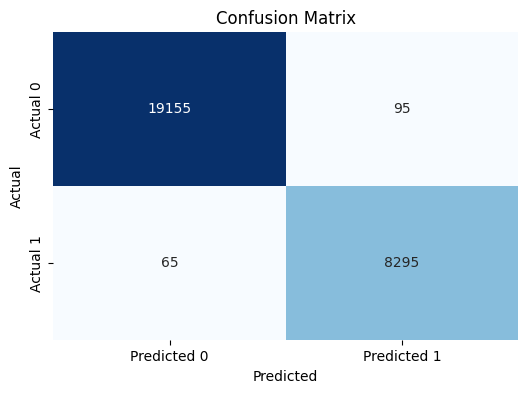

In [27]:
#Makeing the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Applying K-Fold cross-validation with 10 folds
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)

# Print individual accuracy scores for each fold
for fold, accuracy in enumerate(accuracies, start=1):
    print(f"Fold {fold}: Accuracy = {accuracy}")

# Calculate the mean and standard deviation of the accuracies
mean_accuracy = accuracies.mean()
std_accuracy = accuracies.std()

print("\nMean Accuracy: ", mean_accuracy)
print("Standard Deviation of Accuracy: ", std_accuracy)


In [ ]:
# Creating an object for model and fitting it on training data set 
model = LGBMClassifier()
model.fit(X_train, y_train)
 
# Predicting the Target variable
pred = model.predict(X_test)
print(pred)
accuracy = model.score(X_test, y_test)
print(accuracy)

## Sélection du Modèle Random Forest : Une Décision Fondée sur des Performances Exemplaires

Après une évaluation approfondie de plusieurs modèles de classification, notre choix s'est délibérément porté sur le modèle Random Forest en raison de ses performances exceptionnelles. Le modèle a démontré une précision remarquable de près de 99.44% sur l'ensemble de test, illustrant sa capacité à classifier avec une grande exactitude les fichiers PE en logiciels malveillants ou légitimes.

Une performance similaire a été observée sur l'ensemble d'entraînement, atteignant environ 99.99%, soulignant la robustesse du modèle dans sa capacité à généraliser sur des données non vues. La faible variance du modèle, mesurée à 0.0009, témoigne d'une généralisation efficace sans surajustement significatif.

En somme, le modèle Random Forest émerge comme un choix judicieux pour notre tâche de détection de logiciels malveillants, alliant précision, généralisation, et robustesse. Ces résultats confirment la pertinence de ce modèle pour notre application spécifique.

# Interface WEB

Une interface web User-friendly à travers laquelle un utilisateur peut uploader un exécutable suspicieux pour voir s'il est malicieux ou non !

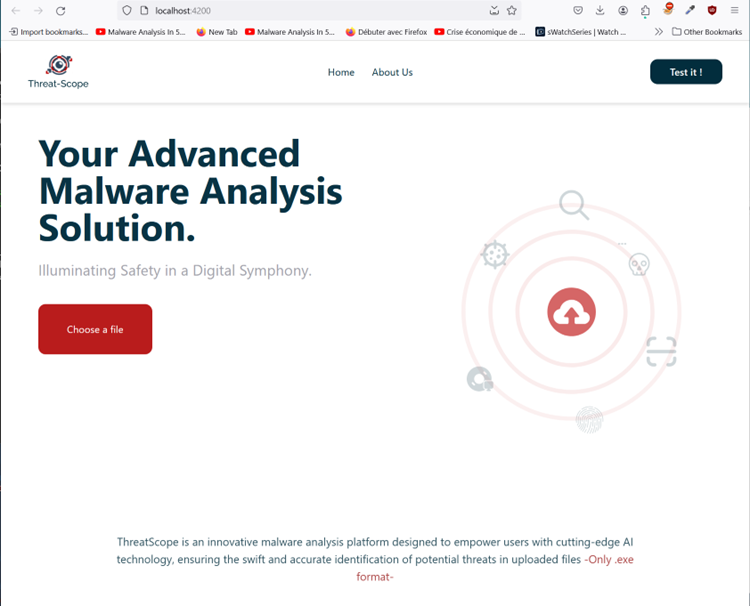


L’Uplaod du fichier suspicieux : 

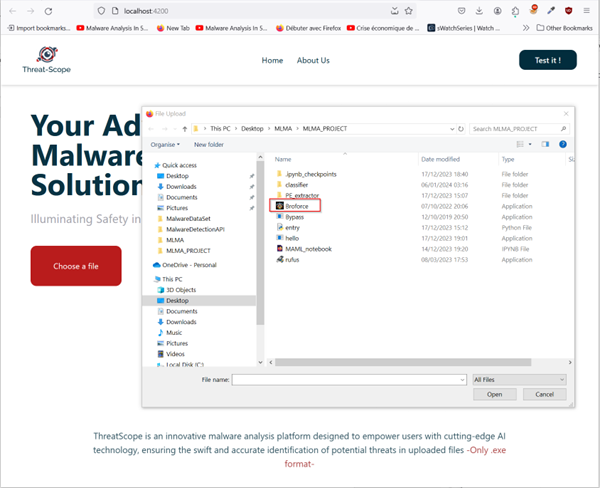

Resultat:

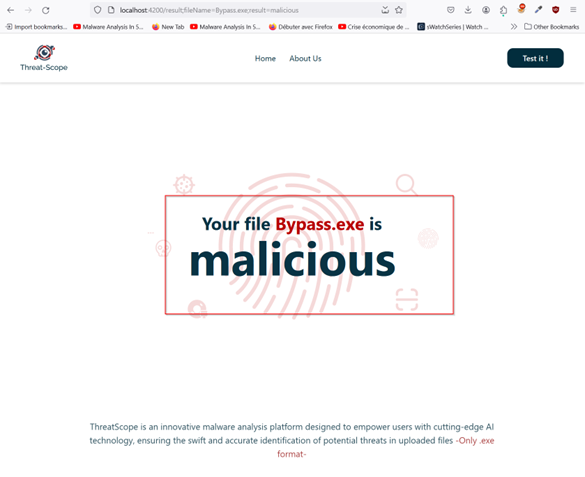

Ce fichier est en effet malicieux!

# Fonctionnement derrière: 

Le REST API est le plus adapté pour cette situation :
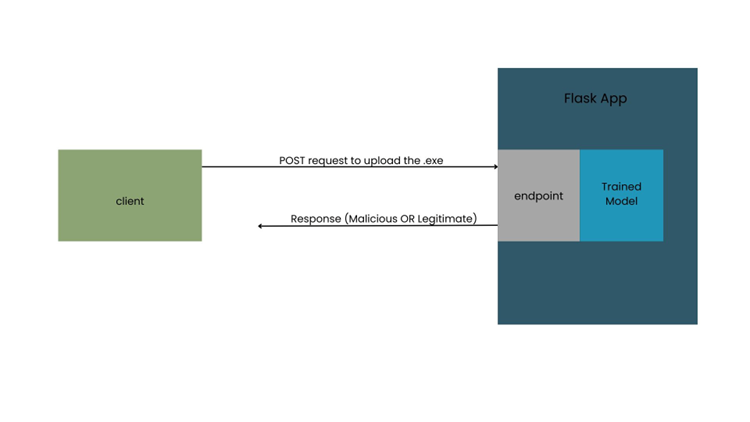

Le répertoire GitHub héberge une application Flask dédiée à la détection de logiciels malveillants. Cette application comporte un point de terminaison `/classify` spécialement conçu pour gérer les requêtes POST. Lorsque cette route est sollicitée, le point de terminaison effectue les étapes suivantes :

1. **Chargement des modèles :** Le point de terminaison charge un modèle d'apprentissage automatique pré-entraîné, stocké sous le nom `classifier.pkl`. Il récupère également les caractéristiques utilisées pour l'entraînement du modèle, enregistrées dans le fichier `features.pkl`.

2. **Extraction des caractéristiques :** L'application extrait les caractéristiques du fichier Portable Executable (PE) téléchargé. Ces caractéristiques sont ensuite comparées aux caractéristiques enregistrées lors de l'entraînement du modèle.

3. **Prédiction du statut du fichier :** À l'aide du classificateur pré-entraîné, l'application prédit si le fichier est malveillant ou légitime en se basant sur les caractéristiques extraites.

4. **Réponse JSON :** Le résultat de la prédiction est renvoyé sous forme de réponse JSON, fournissant des informations sur la classification du fichier, que ce soit en tant que malveillant ou légitime.

Cette architecture permet une intégration transparente de la modélisation de machine learning dans une application web, offrant une solution pratique pour l'analyse des fichiers PE et la détection en temps réel de logiciels malveillants.